# Equity Data Analytics

By: Jingxi Zhao

In [146]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  
sns.set(font='SimHei')  


In [147]:
df = pd.read_csv('equity_data.csv')
df.head(20)

,Company Name,Date,Ticker,Returns,Capitalization,Mkt Cap,FCF Yield,Momentum,Sales Growth 1Y,Sales Growth 5Y,EPS Revision
0,"AAC Holdings, Inc.",12/31/2014,AAC,-17.46,1,651.82,NaN,NaN,75.27,75.27,1.15
1,"AAC Holdings, Inc.",1/30/2015,AAC,41.03,1,537.99,NaN,NaN,75.27,75.27,1.01
2,"AAC Holdings, Inc.",2/27/2015,AAC,-15.03,1,758.71,-1.18,NaN,75.27,75.27,1.09
3,"AAC Holdings, Inc.",3/31/2015,AAC,13.34,1,666.06,-1.18,NaN,14.88,41.72,1.07
4,"AAC Holdings, Inc.",4/30/2015,AAC,12.12,1,756.97,-1.18,NaN,14.88,41.72,1.07
5,"AAC Holdings, Inc.",5/29/2015,AAC,12.09,1,848.70,-2.92,NaN,14.88,41.72,1.15
6,"AAC Holdings, Inc.",6/30/2015,AAC,-12.74,1,950.30,-2.92,NaN,14.88,41.72,1.05
7,"AAC Holdings, Inc.",7/31/2015,AAC,-37.88,1,851.77,-2.92,NaN,14.88,41.72,1.00
8,"AAC Holdings, Inc.",8/31/2015,AAC,-5.76,1,529.08,-2.79,NaN,14.88,41.72,1.01
9,"AAC Holdings, Inc.",9/30/2015,AAC,4.27,1,498.60,-2.79,NaN,14.88,41.72,1.01


## Data Cleaning

In [155]:
df.shape  

(379119, 11)

In [156]:
df.describe()

,Returns,Capitalization,Mkt Cap,FCF Yield,Momentum,Sales Growth 1Y,Sales Growth 5Y,EPS Revision
count,377684.000000,379119.0,379062.000000,363146.000000,366379.000000,3.711590e+05,3.732680e+05,3.573170e+05
mean,0.771014,1.0,6232.435914,1.498125,11.407968,2.597126e+03,4.167795e+03,-2.377026e+02
std,13.905732,0.0,23491.023419,77.590189,69.042617,4.461418e+05,4.938191e+05,5.416899e+05
min,-98.980000,1.0,1.550000,-10296.930000,-99.640000,-1.812420e+03,-1.514150e+03,-9.663676e+07
25%,-5.450000,1.0,385.042500,-0.380000,-16.710000,-1.580000e+00,2.600000e+00,9.600000e-01
50%,0.670000,1.0,1087.470000,4.300000,6.000000,7.070000e+00,9.290000e+00,1.000000e+00
75%,6.630000,1.0,3499.140000,8.070000,29.210000,1.970000e+01,2.127000e+01,1.010000e+00
max,890.390000,1.0,796466.150000,2769.110000,9580.560000,7.846261e+07,7.846261e+07,1.127429e+08


In [157]:
#check nan value
def missing_values_table(df):

        # Total # of missing values

        mis_val = df.isnull().sum()

       

        # Proportion of missing values

        mis_val_percent = 100 * mis_val / len(df)

       

        # Create a table containing the results

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

       

        # Set column names

        mis_val_table_ren_columns = mis_val_table.rename(

        columns = {0 : 'Number of Missing Values', 1 : 'Percentage of Total Values (%)'})

       

        # Sort the table by percentage of missing values (descending order)

        mis_val_table_ren_columns = mis_val_table_ren_columns[

            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(

        'Percentage of Total Values (%)', ascending = False).round(3)

        

        # Print summary information

        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"     

            "There are " + str(mis_val_table_ren_columns.shape[0]) +

              " columns having missing values.")

       

        # Results output

        return mis_val_table_ren_columns

 

mis_train = missing_values_table(df)

print(mis_train)

The dataframe has 11 columns.
There are 7 columns having missing values.
                 Number of Missing Values  Percentage of Total Values (%)
EPS Revision                        21802                           5.751
FCF Yield                           15973                           4.213
Momentum                            12740                           3.360
Sales Growth 1Y                      7960                           2.100
Sales Growth 5Y                      5851                           1.543
Returns                              1435                           0.379
Mkt Cap                                57                           0.015


In [158]:
df1 = df

In [159]:
#delete nan
df1=df1.dropna(thresh=df1.shape[0]*0.5,axis=1) #delete rows having over 50% nan values
df1.dropna(axis=0,how='all') #delete rows having nan values in all fileds
df1.head()

,Company Name,Date,Ticker,Returns,Capitalization,Mkt Cap,FCF Yield,Momentum,Sales Growth 1Y,Sales Growth 5Y,EPS Revision
0,"AAC Holdings, Inc.",12/31/2014,AAC,-17.46,1,651.82,NaN,NaN,75.27,75.27,1.15
1,"AAC Holdings, Inc.",1/30/2015,AAC,41.03,1,537.99,NaN,NaN,75.27,75.27,1.01
2,"AAC Holdings, Inc.",2/27/2015,AAC,-15.03,1,758.71,-1.18,NaN,75.27,75.27,1.09
3,"AAC Holdings, Inc.",3/31/2015,AAC,13.34,1,666.06,-1.18,NaN,14.88,41.72,1.07
4,"AAC Holdings, Inc.",4/30/2015,AAC,12.12,1,756.97,-1.18,NaN,14.88,41.72,1.07


In [160]:
df1.dropna(subset=['Returns','Capitalization'], inplace = True)

In [161]:
#delete duplicate rows
df1.duplicated().sum()
df1.drop_duplicates()
df1.head()

,Company Name,Date,Ticker,Returns,Capitalization,Mkt Cap,FCF Yield,Momentum,Sales Growth 1Y,Sales Growth 5Y,EPS Revision
0,"AAC Holdings, Inc.",12/31/2014,AAC,-17.46,1,651.82,NaN,NaN,75.27,75.27,1.15
1,"AAC Holdings, Inc.",1/30/2015,AAC,41.03,1,537.99,NaN,NaN,75.27,75.27,1.01
2,"AAC Holdings, Inc.",2/27/2015,AAC,-15.03,1,758.71,-1.18,NaN,75.27,75.27,1.09
3,"AAC Holdings, Inc.",3/31/2015,AAC,13.34,1,666.06,-1.18,NaN,14.88,41.72,1.07
4,"AAC Holdings, Inc.",4/30/2015,AAC,12.12,1,756.97,-1.18,NaN,14.88,41.72,1.07


In [162]:
df1.dtypes

Company Name        object
Date                object
Ticker              object
Returns            float64
Capitalization       int64
Mkt Cap            float64
FCF Yield          float64
Momentum           float64
Sales Growth 1Y    float64
Sales Growth 5Y    float64
EPS Revision       float64
dtype: object

In [163]:
#change data type
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y", errors = 'coerce')

## Data Processing and Visualization

Text(0, 0.5, 'Returns')

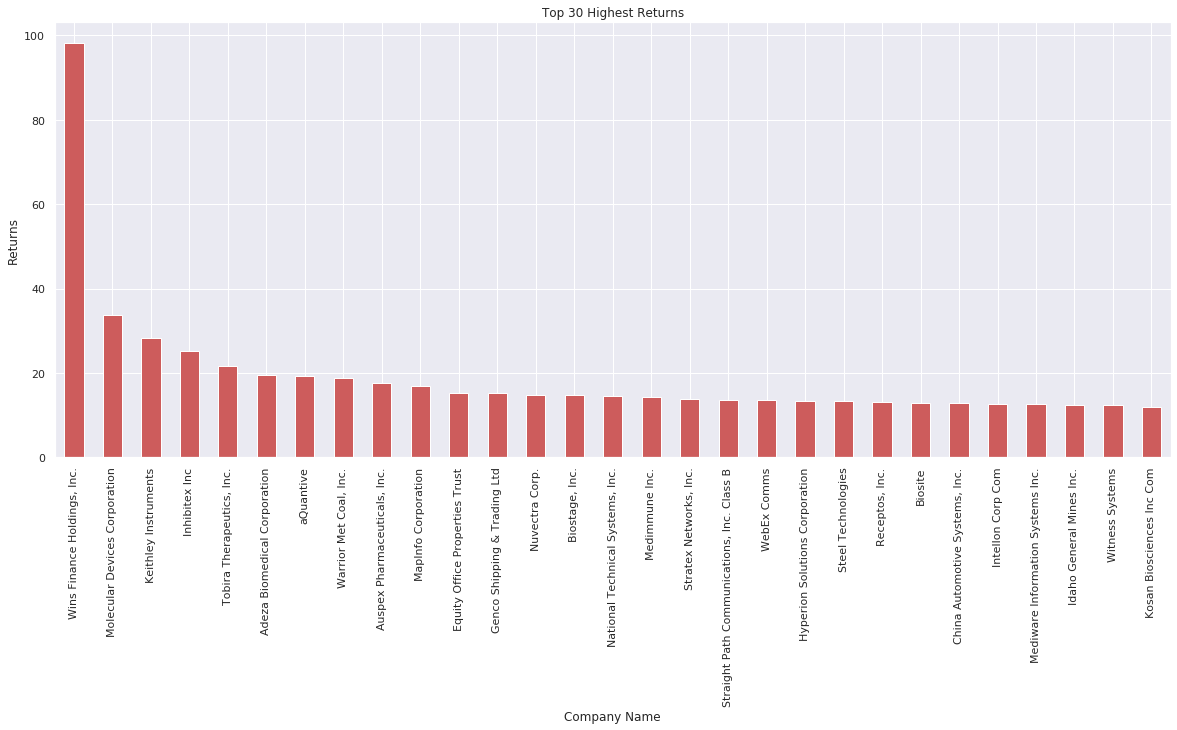

In [165]:
#group by company and aggregated by mean returns
df_bycompany = df1[['Company Name','Returns']].groupby(df1['Company Name']).agg(['mean']).sort_values(('Returns','mean'),ascending=False)[0:29].plot(kind='bar',legend=False,figsize=(20,8),color='IndianRed')
plt.title('Top 30 Highest Returns')
plt.ylabel('Returns')

Wins Fiannce HOldings,Inc ranks top in Returns with over 90 based on the mean of returns. 

Text(0, 0.5, 'Capitalization')

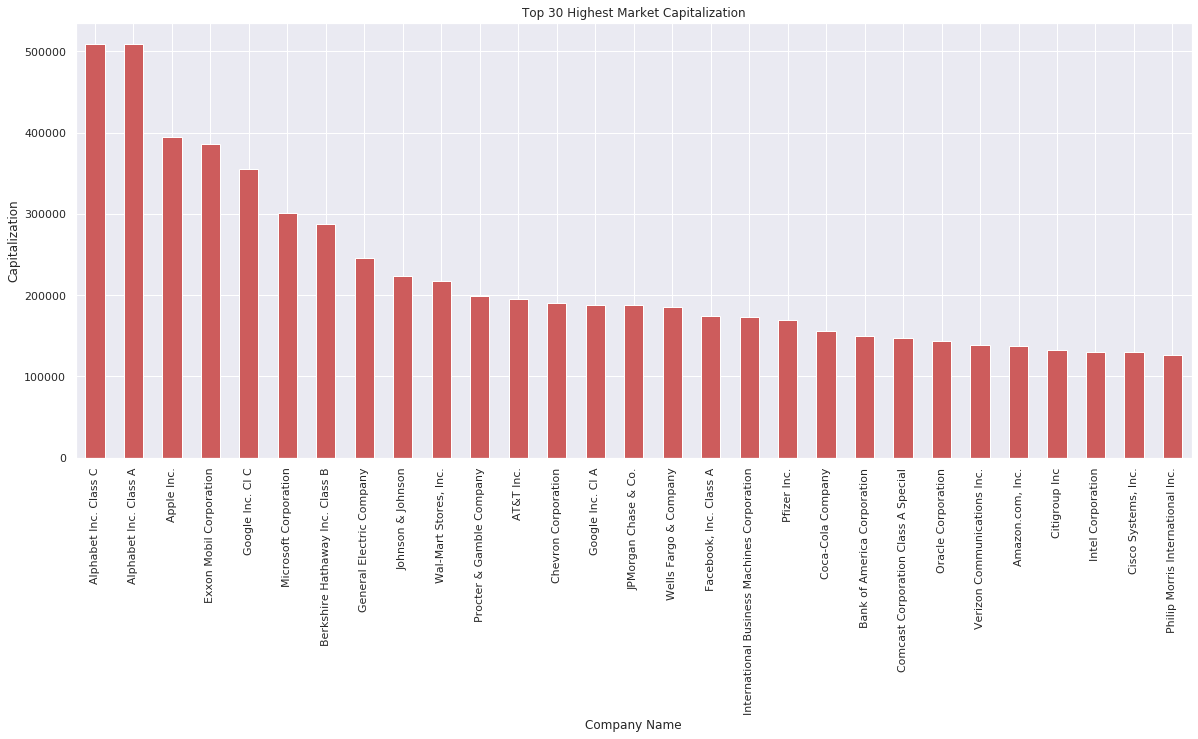

In [167]:
df_bycompany_cap = df1[['Company Name','Mkt Cap']].groupby(df1['Company Name']).agg(['mean']).sort_values(('Mkt Cap','mean'),ascending=False)[0:29].plot(kind='bar',legend=False,figsize=(20,8),color='IndianRed')
plt.title('Top 30 Highest Market Capitalization')
plt.ylabel('Capitalization')

Alphabet ranks top 1 based on the mean of capitalization with over 500000 dollar. 

### Deep analysis on Alphabet


In [170]:
#Alphabet
dfalphabet = df1[df1['Company Name'].isin(['Alphabet Inc. Class C'])]

In [171]:
dfalphabet.head()

,Company Name,Date,Ticker,Returns,Capitalization,Mkt Cap,FCF Yield,Momentum,Sales Growth 1Y,Sales Growth 5Y,EPS Revision
15538,Alphabet Inc. Class C,2015-10-30,GOOG,4.47,1,460410.06,4.05,29.52,10.21,21.37,1.00
15539,Alphabet Inc. Class C,2015-11-30,GOOG,2.19,1,478810.82,3.46,37.43,10.21,21.37,1.00
15540,Alphabet Inc. Class C,2015-12-31,GOOG,-2.10,1,488852.18,3.46,44.56,10.21,21.37,1.00
15541,Alphabet Inc. Class C,2016-01-29,GOOG,-6.08,1,478494.77,3.46,45.89,10.21,21.37,1.00
15542,Alphabet Inc. Class C,2016-02-29,GOOG,6.76,1,450951.69,3.05,25.30,10.21,21.37,1.01


In [206]:
dfalphabet.to_csv('dfalphabet.csv')

Text(0.5, 1.0, 'Market Capitalizaiton of Alphabet Class C from 2016 to 2017')

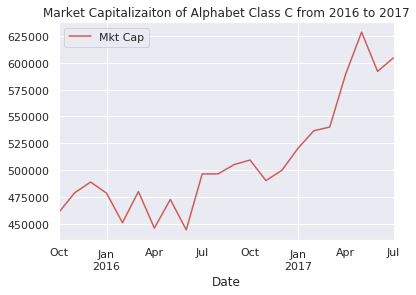

In [182]:
dfalphabet.set_index('Date')[['Mkt Cap']].plot(color='IndianRed')
plt.title('Market Capitalizaiton of Alphabet Class C from 2016 to 2017')

Text(0.5, 1.0, 'FCF Yield and Momentum of Alphabet Class C from 2016 to 2017')

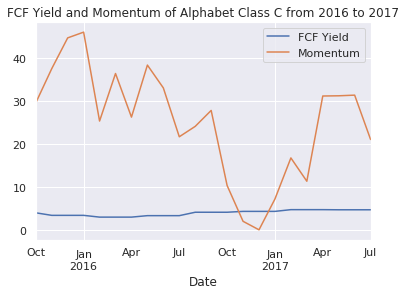

In [185]:
dfalphabet.set_index('Date')[['FCF Yield','Momentum']].plot()
plt.title('FCF Yield and Momentum of Alphabet Class C from 2016 to 2017')

Text(0.5, 1.0, 'Sales Growth 1 and 5 year of Alphabet Class C from 2016 to 2017')

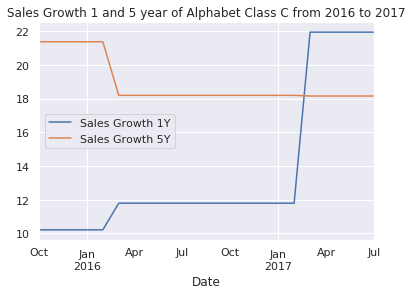

In [187]:
dfalphabet.set_index('Date')[['Sales Growth 1Y','Sales Growth 5Y']].plot()
plt.title('Sales Growth 1 and 5 year of Alphabet Class C from 2016 to 2017')

### Use Heatmap to check the relaiton ship between 1 and 5 year growth and EPS and FCF yield.

In [193]:
alpha_heatmap = dfalphabet[['EPS Revision','FCF Yield','Sales Growth 1Y','Sales Growth 5Y']]
alpha_heatmap.head()

,EPS Revision,FCF Yield,Sales Growth 1Y,Sales Growth 5Y
15538,1.00,4.05,10.21,21.37
15539,1.00,3.46,10.21,21.37
15540,1.00,3.46,10.21,21.37
15541,1.00,3.46,10.21,21.37
15542,1.01,3.05,10.21,21.37


In [204]:
def test(df):
    dfData = df.corr()
    plt.subplots(figsize=(12,12)) 
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
    plt.savefig('./BluesStateRelation.png')
    plt.show()

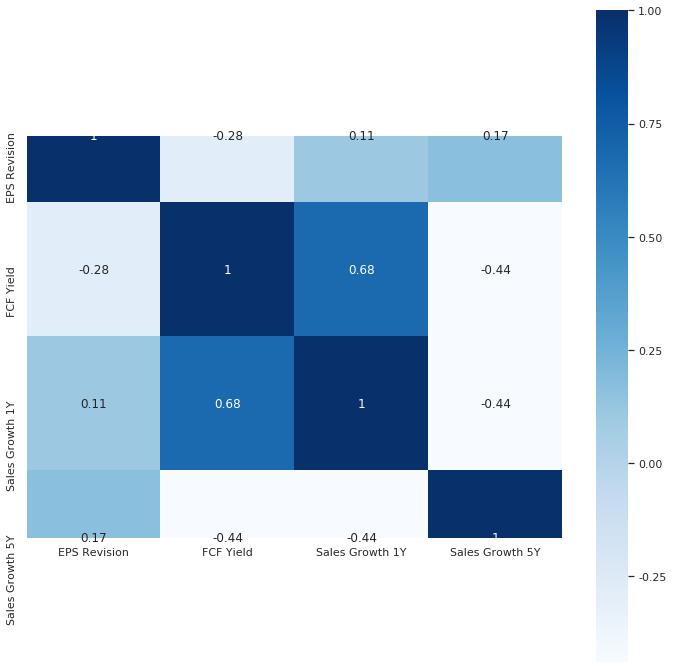

In [205]:
test(alpha_heatmap)

From the Correlation coefficient thermodynamic matrix figure above, there might be some correlaitons between one year sales growth and fcf yield. To do more indepth analysis,
I will add all other companies to the data and then run the regression to evaluate the relationships betwwen inverstment and profit.

# Questions

1. How did you process the raw data?
2. What does the column Capitalizaion mean?
3. Is it a good way to run regression analysis to the equity data?
4. How do you process companies' data from different time periods(each company has different start time and end time in column Date)?